# Otras formas de obtener la importancia de las variables: SHAP y LIME

<img src="carpintero.jpg" align="center" width="70%"/>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import auc, RocCurveDisplay 

In [2]:
data_raw = pd.read_csv('./Data/datasets_222487_478477_framingham.csv')
data = data_raw.dropna()
data.shape


(3656, 16)

Utilizamos nuevamente el dataset "Framingham heart study". Podemos utilizarlo para predecir la probabilidad de una enfermedad corononaria con 10 años de antipación (indicada por la variable binaria **TenYearCHD**), a partir de un conjunto de variables predictoras.

In [4]:
#Proporción de clase
data.TenYearCHD.value_counts() / data_raw.shape[0]

TenYearCHD
0    0.731241
1    0.131430
Name: count, dtype: float64

In [5]:
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [5]:
data.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [6]:
X=data.drop(["TenYearCHD"],axis=1)
y=data["TenYearCHD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=717)
X_test.reset_index(inplace=True,drop=True)

In [7]:
# sc = StandardScaler()
# X_train_sc = sc.fit_transform(X_train)
# X_test_sc = sc.transform(X_test)

In [7]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_jobs=3, use_label_encoder=False)

/Users/anoguera/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [8]:
from scipy import stats
param_dist = {'n_estimators': stats.randint(150, 500),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }

In [9]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)
from sklearn.model_selection import RandomizedSearchCV
xgb = RandomizedSearchCV(model_xgb,param_dist, cv=cv, verbose=1, n_jobs=3,scoring='roc_auc',n_iter=10,random_state=41)

In [10]:
xgb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/anoguera/anaconda3/envs/itba_apa_env/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importan...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f7ba1386fd0>,
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7ba1386c10>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f7b613cd100>},
                   random_state=41, scoring='roc_auc', verbose=1)

In [12]:
xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6003694494979761, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.037196534196840936,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=393, n_jobs=3, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [11]:
X_train.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [12]:
X_train

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
1635     1   52        1.0              1         2.0     0.0   
462      0   49        1.0              0         0.0     0.0   
3092     0   60        2.0              0         0.0     0.0   
1517     0   56        3.0              0         0.0     0.0   
2087     1   57        3.0              0         0.0     0.0   
...    ...  ...        ...            ...         ...     ...   
1806     0   40        3.0              1         1.0     0.0   
2401     0   37        4.0              1        10.0     0.0   
1648     0   60        3.0              0         0.0     0.0   
1994     1   43        2.0              0         0.0     1.0   
147      0   47        3.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
1635                0             0         0    246.0  122.0   81.0  27.61   
462                 0             0         0    305.0  135.0   89.0  25.04   
3092                0             1         0    298.0  133.0   89.0  25.09   
1517                0             0         0    248.0  112.5   60.0  22.69   
2087                0             0         0    213.0  141.0   90.0  30.77   
...               ...           ...       ...      ...    ...    ...    ...   
1806                0             0         0    236.0  135.0   83.0  23.48   
2401                0             0         0    156.0  120.0   87.0  21.80   
1648                0             0         0    268.0  123.0   82.0  29.47   
1994                0             1         0    234.0  173.0   96.0  27.99   
147                 0             1         0    219.0  153.0   98.0  22.02   

      heartRate  glucose  
1635       90.0     98.0  
462        62.0    117.0  
3092       83.0     81.0  
1517       75.0     92.0  
2087       60.0     77.0  
...         ...      ...  
1806       95.0     90.0  
2401       66.0     89.0  
1648       80.0     85.0  
1994      100.0     76.0  
147        80.0     92.0  

[2559 rows x 15 columns]

In [13]:
y_pred_proba=xgb.predict_proba(X_test)[:,1]

In [14]:
from sklearn.metrics import roc_auc_score
print(f'AUC CV: {round(xgb.best_score_,2)}')
print(f'AUC test: {round(roc_auc_score(y_test,y_pred_proba),2)}')

AUC CV: 0.7
AUC test: 0.7


Obtenemos la importancia de las variables de la forma tradicional...

In [15]:
feat_imp_df=pd.concat([pd.Series(X_train.columns),pd.Series(xgb.best_estimator_.feature_importances_)],axis=1)
feat_imp_df.columns=['var','imp']
feat_imp_df.sort_values(by='imp',ascending=False)

var       imp
1               age  0.121362
7      prevalentHyp  0.118682
0              male  0.078551
10            sysBP  0.075225
4        cigsPerDay  0.071759
5            BPMeds  0.071127
11            diaBP  0.066356
2         education  0.064719
12              BMI  0.063535
14          glucose  0.061135
9           totChol  0.058949
13        heartRate  0.058093
8          diabetes  0.049157
3     currentSmoker  0.041351
6   prevalentStroke  0.000000

¿Qué es la *explicabilidad* de un modelo?

Si trabajamos con un modelo lineal, la importancia de las variables vendrá dada por los pesos asignados a cada variable. En el caso de un modelo de árboles, podremos realizar el cálculo a partir de la entropía o la ganancia de información.
<br><br>
¿Qué hay de los modelos no lineales o los ensambles?

Una alternativa para mesurar el aporte de las variables al modelo es a través de los valores **SHAP (SHapley Additive exPlanations)** y **LIME (Local Interpretable Model-agnostic Explanations)**. Ambos métodos son útiles para darle una mayor interpretabilidad a modelos no lineales (a veces llamados de "caja negra" o *black box*), como los ensambles de árboles.
<br><br>

<img src="shap-logo.png">

¿Qué son los valores SHAP?
Estos valores están inspirados en los valores Shapley de la teoría de juegos. <br><br>
La idea es realizar variaciones del modelo original, utilizando solo una parte de las variables predictoras, a fin de estimar la contribución *marginal* de cada variable al resultado final. 

<img src="error log.jpg">

Supongamos que tres amigos, Ann, Bob y Cindy martillan de forma sucesiva el tronco del error.
¿Cúal es la contribución de cada uno a la reducción del error?

Las contribuciones serán distintas según el orden en que actúen, lo que nos deja con 6 permutaciones posibles:

<img src="contribuciones.png">

Lo que nos importa, entonces, es la contribución marginal promedio de cada persona: 2cm para Ann, 32cm para Bob y 4cm para Cindy.<br><br>
Los valores Shapley, entonces, son el promedio de las contribuciones marginales para todas las permutaciones, siendo "las personas" las variables predictoras. En este caso, la variable "Bob" es por lejos la que en promedio más aporta a la reducción del error, seguido, con un aporte mucho menor, por las variables "Cindy" y "Ann".

*En otros términos, podemos decir que los valores Shapley calculan la importancia de una feature comparando lo que el modelo predice con o sin la feature. Es decir, se comparan las predicciones de un modelo  con y sin una feature específica, de forma iterativa para cada feature y cada caso en el dataset. Sin embargo, dado que el orden en que un modelo "ve" las features puede afectar la predicción, esto se hace en todos los órdenes posibles, de modo que las features sean comparadas de forma más justa.*



Los valores SHAP (SHapley Additive exPlanations) se basan en el método para calcular los valores Shapley. Poseen tres importantes características:
- Interpretabilidad global: muestran cuanto aporta cada predictor, ya sea positiva o negativamente, a la variable target. 
- Intepretabilidad local: cada observación tiene su conjunto específico de valores SHAP. Esto puede ayudar a mostrar relaciones no lineales entre las variables predictoras y la variable target. 
- Los valores SHAP pueden calcularse para cualquier método basado o no en árboles.

In [18]:
# pip install shap

In [16]:
xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6003694494979761, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.037196534196840936,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=393, n_jobs=3, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [17]:
# %%timeit
import shap

explainer = shap.TreeExplainer(xgb.best_estimator_)
shap_values = explainer(X_train)

Shap nos ofrece un gráfico que enriquece el típico gráfico de barras de feature importance, llamado **summary_plot**. En él vemos, de forma desagregada, la importancia de cada variable para *cada caso en particular*.
<br><br>
Como intepretar el summary_plot:

- El eje y indica el nombre de la variable, en orden de importancia de más alto a más bajo. 
- El eje x indica el valor SHAP. Indica cuanto es el cambio en log-odds. De este número podemos extraer la probabilidad de éxito.
- El gradiente de color indica el valor original para esa variable. En las variables booleanas, toma dos colores, pero en las númericas contiene todo el espectro.
- Cada punto representa una fila del dataset original.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


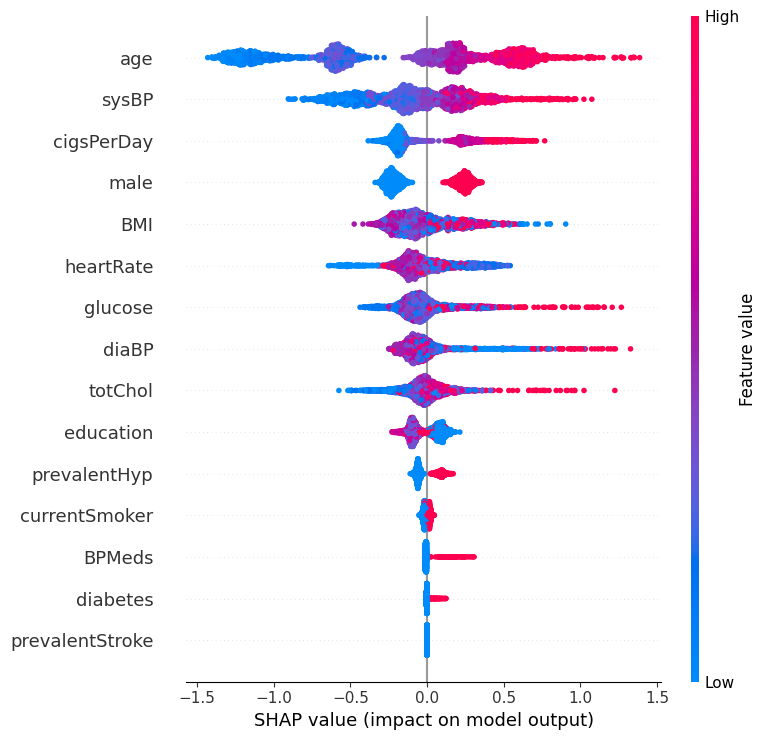

In [18]:
shap.summary_plot(shap_values, X_train)

¿Cómo podemos leer el gráfico de arriba?
- En el caso de las tres primeras variables, la interpretación es lineal. A mayor valor de la variable, más impacto en la probabilidad de alcanzar la clase positiva. En este caso, a mayor edad, presión sistólica y cigarillos fumados por día, más chances de contraer una enfermedad coronaria.
- En el caso de variables binarias, como ser el sexo masculino, hipertensión preexistente o si es fumador actual, también hay una interpretación lineal (cuando la variable es 1, hay más chances de contraer una enfermedad coronaria). Notar que el efecto es más fuerte en el caso de la primera variable y más leve en el caso de la última.
- Hay variables adonde la relación parece no ser lineal, como el BMI y heartRate. Incluso, en el 2do caso vamos que un valor bajo está asociado tanto a la clase positiva como a la negativa. Valores altos de esta variable parecen asociarse, levemente, a una probabilidad mayor de la clase negativa. 

También podríamos querer ver, de forma sintética, cuál es el aporte medio de cada variable al modelo:

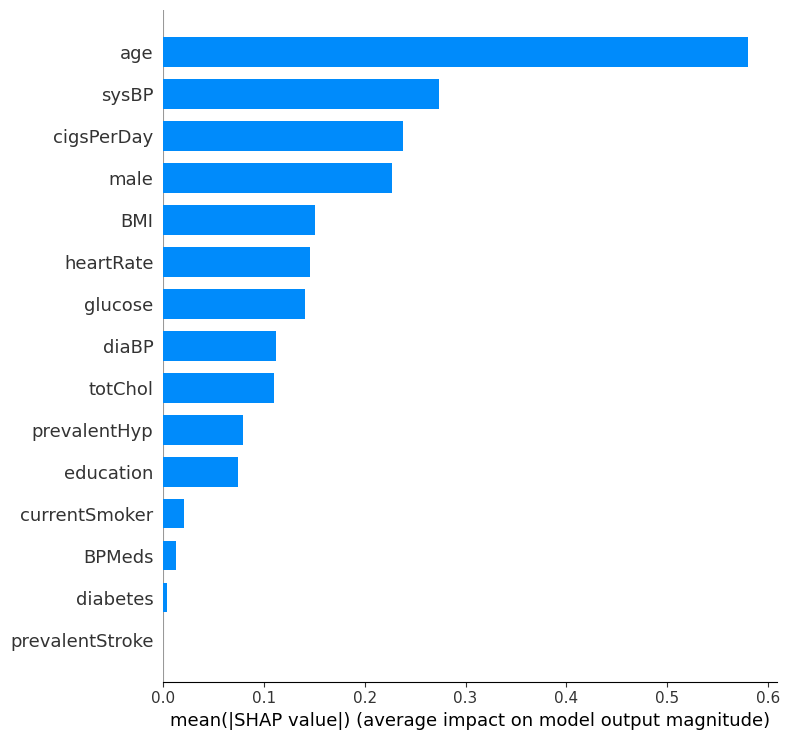

In [22]:
shap.summary_plot(shap_values, X_train,plot_type='bar')

In [19]:
import matplotlib as plt
from matplotlib.lines import Line2D
import seaborn as sns

def ABS_SHAP(df_shap,df):

    shap_v = pd.DataFrame(df_shap.copy())
    shap_v.columns = df.columns
    df_v = df.copy().reset_index().drop('index',axis=1)
    df_v = df_v.astype('float')
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    feature_list = df.columns
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'#ff0051','#0076f1')

    sns.set_style("whitegrid")
    
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = False).head(10)
    k2.reset_index(inplace=True,drop=True)
    k2['SHAP_abs']=round(k2['SHAP_abs'],2)
    colorlist = k2['Sign']
    ax=sns.barplot(data=k2,y='Variable',x='SHAP_abs',palette=colorlist,)
    ax.set_xlabel("Mean SHAP Value")
    ax.legend([Line2D([0], [0], color='#ff0051', lw=4),Line2D([0], [0], color='#0076f1', lw=4)], ['Positiva', 'Negativa'],title='Correlación')


En esta pequeña variante, vemos el mismo gráfico pero incorporando **el sentido de la correlación**. Puede ser engañoso cuando la relación no es lineal, pero es útil si queremos enriquecer el gráfico anterior.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


invalid value encountered in divide
invalid value encountered in divide


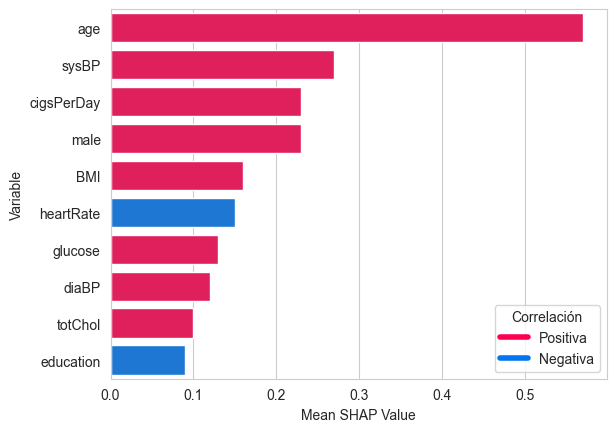

In [20]:
ABS_SHAP(shap_values.values,X_train)

Por otro lado, tenemos el **gráfico en cascada** (*waterfall*), que nos permite analizar la importancia de cada variable para cada caso concreto.<br><br>
*Partimos de un valor esperado de logloss (E), es decir, el valor que obtendríamos si no tuvieramos información de ninguna de las features del modelo, para llegar a una estimación final de logloss, a partir del aporte de cada una de las features.*
<br><br>
Es decir, el modelo calcula un valor de logloss (tomando en cuenta la diferencia entre predicción y clase real) medio para todo el dataset, para luego comparar la variación de logloss a partir de la inclusión de cada variable.
<br><br>
Analicemos lo que pasa, por ejemplo, en el caso del caso de test con la mayor probabilidad de tener una enfermedad cardíaca:

In [21]:
print(f'Caso con mayor probabilidad: {y_pred_proba.argmax()}')
print(f'Score: {y_pred_proba.max()}')

Caso con mayor probabilidad: 955
Score: 0.7868801355361938


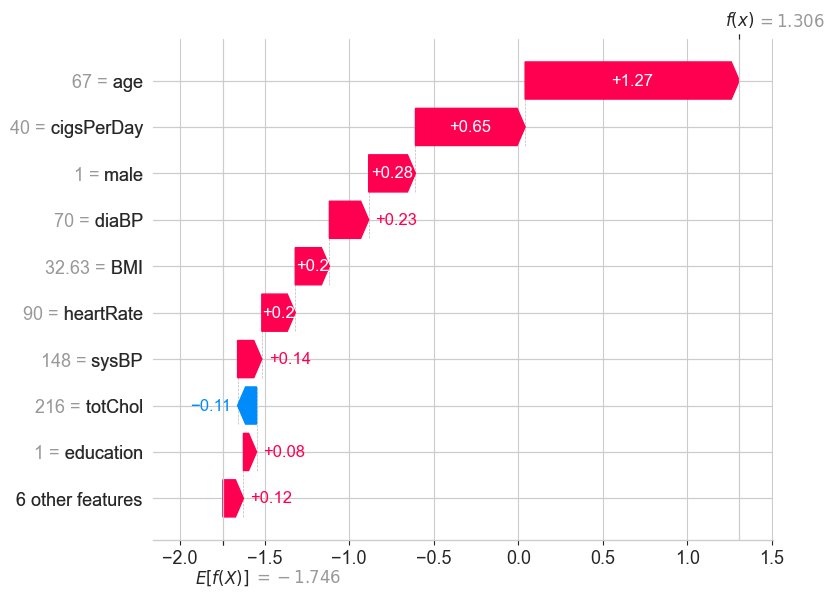

In [22]:
shap_values_f = explainer(X_test.loc[X_test.index==y_pred_proba.argmax(),:])
shap.plots.waterfall(shap_values_f[0])

¿Cómo leemos este gráfico? Partimos del valor promedio o la esperanza para nuestra variable target.

Luego se suman o restan los aportes de cada variable, de modo tal que el valor SHAP final será el resultado de sumar los aportes de cada variable al valor esperado o promedio.
<br><br>
Vemos en este caso que la edad y los cigarrilos al día explican gran parte del score asignado al caso. En este caso específico, la variable heartRate es la 3ra variable más importante (en el promedio es la 6ta variable) y hace un aporte positivo.


*Aclaración*

Podemos convertir la esperanza de Log Loss a probabilidad utilizando la fórmula:

1 / (1 + np.exp(-x))) -> 1 / (1 + np.exp(-(-1.747)))) = 0.148, que es una buena aproximación de y_pred.mean()=0.15

Para ver la importancia de las variables en forma de **probabilidades**, tenemos dos caminos:

1. Instanciar el objeto shap_values de la forma:

explainer = shap.TreeExplainer(model_xgb,data=train_ohe,model_output='probability')

Luego todos los gráficos a continuación se generarán a partir de probabilidades. El problema con este método es que las probabilidades generadas no estarán calibradas con las probabilidades arrojadas por el método predict_proba del modelo.
<br><br>

2. Instanciar el objeto shap_values de la forma:

explainer = shap.TreeExplainer(model_xgb)

El gráfico de cascada se mostrará en formato Log-Loss en lugar de probabilidades. Pero podremos mostrar el gráfico de fuerza en forma de probabilidades utilizando el parámetro link='logit'. Por ejemplo:

shap.plots.force(shap_values_f,link='logit').

Esta forma muestra las probabilidades de forma similar al método predict_proba del modelo, y por eso es la preferida por nosotros.



Analicemos ahora el caso con menor probabilidad:

In [23]:
print(f'Caso con menor probabilidad: {y_pred_proba.argmin()}')
print(f'Score: {y_pred_proba.min()}')

Caso con menor probabilidad: 632
Score: 0.009268201887607574


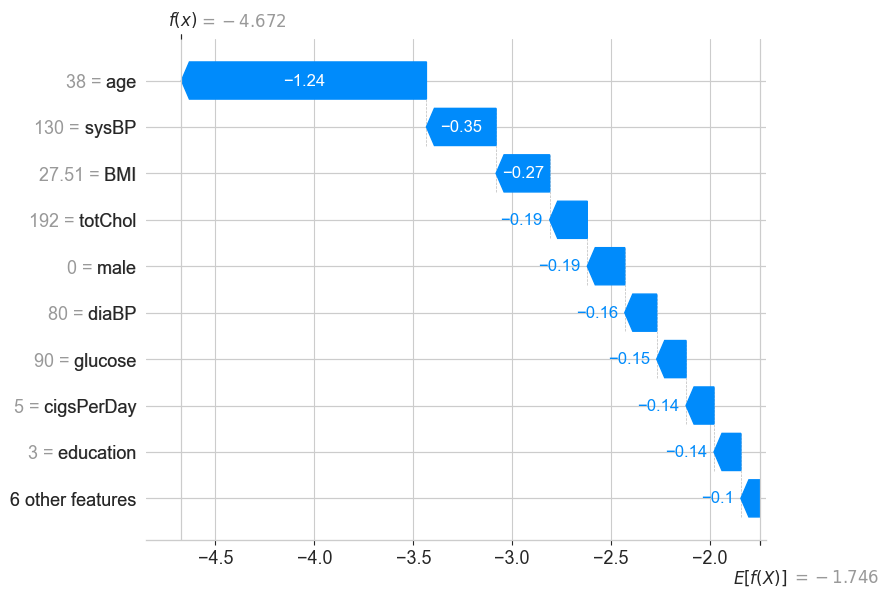

In [24]:
shap_values_f = explainer(X_test.loc[X_test.index==y_pred_proba.argmin(),:])
shap.plots.waterfall(shap_values_f[0])

La edad nuevamente aparece como la variable más importante (en este caso, restando probabilidad), seguida de la presión sistólica y la variable BMI.

Podemos observar los mismos datos de forma más sintética en un **gráfico de fuerza** (*forceplot*), ya sea aplicado a un caso puntual, como a todo el dataset (considerar el tamaño del dataset en este caso, porque es un gráfico bastante pesado):

In [25]:
shap.initjs()
shap_values_f = explainer(X_test.loc[X_test.index==y_pred_proba.argmin(),:])
shap.plots.force(shap_values_f)

Utilizando el parámetro link, podemos convertir la unidad de medida de log-odds a probabilidades, lo cual hace no cambia la importancia relativa de las variables, pero hace más entendible el resultado final:

In [26]:
shap.initjs()
shap_values_f = explainer(X_test.loc[X_test.index==y_pred_proba.argmax(),:])
shap.plots.force(shap_values_f,link='logit')

In [27]:
shap_values_f = explainer(X_test.loc[X_test.index==y_pred_proba.argmin(),:])
shap.plots.force(shap_values_f,link='logit')

In [28]:
shap.plots.force(shap_values,link='logit')

Otra forma de ver el aporte relativo de cada variable a la predicción final (ya sea para uno o más casos), es a través del **decision_plot**:

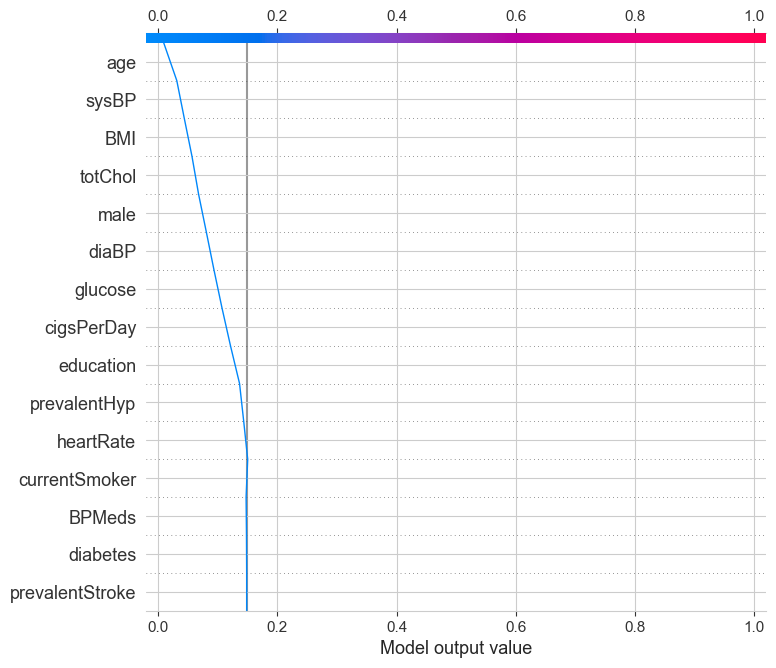

In [29]:
shap_values = explainer.shap_values(X_test)[X_test.index==y_pred_proba.argmin()]
shap.decision_plot(explainer.expected_value, shap_values, X_test.columns,link='logit')

Ventajas de los valores SHAP:
- Permite analizar en profundidad la importancia de cada variable en un modelo predictivo.
- Podemos entender relaciones no lineales con la variable target.
- Podemos entender como actúa cada variable para cada caso puntual.

Desventajas

- Costoso computacionalmente, por lo que con datasets grandes posiblemente necesitemos trabajar con un subconjunto de datos, en lugar del dataset original.

# LIME

Las siglas LIME vienen de Local Interpretable Model-agnostic Explanations, o explicaciones interpretables localmente, agnósticas del modelo.<br><br>
¿Qué significa la primera parte, interpretabilidad local? Significa que este método busca responder la pregunta, ¿Por qué el modelo se comparte de determinada manera en la cercanía del punto X?. Es decir, que LIME mira solo la estructura local y no global de los datos.<br><br>
La segunda parte refiere a que podemos aplicar este método a cualquier algoritmo.

<img src="lime.png">

¿Cuál es la intuición detrás de LIME?

La función de decisión f de un modelo de caja negra (desconocida para LIME) es representada por el fondo azul/rosa, y no es aproximable por una función lineal. La cruz roja (X) es el punto que quiere ser explicado. LIME toma una muestra de instancias, ponderadas por su cercanía a X, y ajusta un modelo lineal surrogado g(), que ajusta bien de forma local (pero no global). Es decir, **en la cercanía del punto X, el modelo surrogado g() se asemeja mucho a la función original f()**. 

In [31]:
# !pip install lime

In [32]:
import lime
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=[0, 1],
    mode='classification')

Utilizemos el método show_in_notebook de LIME para obtener la feature importance de los casos extremos que habíamos visto anteriormente:

In [33]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[y_pred_proba.argmax()], 
    predict_fn=xgb.best_estimator_.predict_proba)
exp.show_in_notebook()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [34]:
print(f'La predicción utilizando la función líneal ajustada por LIME sería: {exp.intercept[1]+pd.DataFrame(exp.as_list())[1].sum()}')

La predicción utilizando la función líneal ajustada por LIME sería: 0.5292766451157372


En este gráfico observamos los coeficientes generados por LIME.
Observamos que las features más importantes difieren de las generadas por SHAP. En este caso con edad, cigarrillos por día y presión sistólica, mientras que con SHAP fueron edad, cigarrillos por día y ritmo cardíaco. 

In [35]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[632], 
    predict_fn=xgb.best_estimator_.predict_proba)
exp.show_in_notebook(show_table=True)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [39]:
print(f'La predicción utilizando la función líneal ajustada por LIME sería: {exp.intercept[1]+pd.DataFrame(exp.as_list())[1].sum()}')

La predicción utilizando la función líneal ajustada por LIME sería: 0.04731667912886492


Nuevamente, las features más importantes difieren de las generadas por SHAP. En este caso edad, glucosa y sexo, mientras que antes habían sido edad, presión sistólica y BMI.

Ventajas de LIME:
- Más rápido que SHAP (puede ser más útil con datasets voluminosos)

Desventajas:
- Menos preciso 
- Solo ofrece interpretabilidad a nivel local, a diferencia de SHAP, que ofrece una interpretación local y global.

# PRÁCTICA

A partir del dataset de Titanic, analizar la feature importance generada por el modelo, y compararla con los métodos SHAP y LIME.

In [36]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv('Data/Titanic.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [37]:
vars_cat=['Sex','Pclass','Embarked']
for col in vars_cat:
    df[col] = df[col].astype('object')
    
df.loc[:,['Cabin','Embarked']]=df.loc[:,['Cabin','Embarked']].fillna('NA')
df=df.drop(columns=['PassengerId','Name','Ticket','Cabin'])

train, test = train_test_split(df, test_size=0.20, random_state=42)
train.reset_index(inplace=True,drop=True)
test.reset_index(inplace=True,drop=True)


In [38]:
encoder = OneHotEncoder(drop='first',sparse=False)
train_onehot = encoder.fit_transform(train[vars_cat])
train_onehot=pd.DataFrame(train_onehot,columns=encoder.get_feature_names_out())

train_ohe=pd.concat([train,train_onehot],axis=1)
train_ohe.drop(columns=vars_cat,inplace=True)
train_ohe

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


Survived   Age  SibSp  Parch      Fare  Sex_male  Pclass_2  Pclass_3  \
0           0  45.5      0      0   28.5000       1.0       0.0       0.0   
1           0  23.0      0      0   13.0000       1.0       1.0       0.0   
2           0  32.0      0      0    7.9250       1.0       0.0       1.0   
3           0  26.0      1      0    7.8542       1.0       0.0       1.0   
4           0   6.0      4      2   31.2750       0.0       0.0       1.0   
..        ...   ...    ...    ...       ...       ...       ...       ...   
707         1  21.0      0      0    7.6500       0.0       0.0       1.0   
708         0   NaN      0      0   31.0000       1.0       0.0       0.0   
709         0  41.0      2      0   14.1083       1.0       0.0       1.0   
710         1  14.0      1      2  120.0000       0.0       0.0       0.0   
711         0  21.0      0      1   77.2875       1.0       0.0       0.0   

     Embarked_NA  Embarked_Q  Embarked_S  
0            0.0         0.0         1.0  
1            0.0         0.0         1.0  
2            0.0         0.0         1.0  
3            0.0         0.0         1.0  
4            0.0         0.0         1.0  
..           ...         ...         ...  
707          0.0         0.0         1.0  
708          0.0         0.0         1.0  
709          0.0         0.0         1.0  
710          0.0         0.0         1.0  
711          0.0         0.0         1.0  

[712 rows x 11 columns]

In [40]:
test_onehot = encoder.transform(test[vars_cat])
test_onehot=pd.DataFrame(test_onehot,columns=encoder.get_feature_names_out())

test_ohe=pd.concat([test,test_onehot],axis=1)
test_ohe.drop(columns=vars_cat,inplace=True)
test_ohe

Survived   Age  SibSp  Parch     Fare  Sex_male  Pclass_2  Pclass_3  \
0           1   NaN      1      1  15.2458       1.0       0.0       1.0   
1           0  31.0      0      0  10.5000       1.0       1.0       0.0   
2           0  20.0      0      0   7.9250       1.0       0.0       1.0   
3           1   6.0      0      1  33.0000       0.0       1.0       0.0   
4           1  14.0      1      0  11.2417       0.0       0.0       1.0   
..        ...   ...    ...    ...      ...       ...       ...       ...   
174         0  17.0      0      0   7.1250       1.0       0.0       1.0   
175         0   NaN      0      0   7.2250       1.0       0.0       1.0   
176         1  38.0      1      5  31.3875       0.0       0.0       1.0   
177         1  17.0      0      0  10.5000       0.0       1.0       0.0   
178         1   4.0      1      1  16.7000       0.0       0.0       1.0   

     Embarked_NA  Embarked_Q  Embarked_S  
0            0.0         0.0         0.0  
1            0.0         0.0         1.0  
2            0.0         0.0         1.0  
3            0.0         0.0         1.0  
4            0.0         0.0         0.0  
..           ...         ...         ...  
174          0.0         0.0         1.0  
175          0.0         0.0         0.0  
176          0.0         0.0         1.0  
177          0.0         0.0         1.0  
178          0.0         0.0         1.0  

[179 rows x 11 columns]

In [41]:
y_train=train['Survived']
y_test=test['Survived']

X_train_ohe=train_ohe.drop(columns=['Survived'])
X_test_ohe=test_ohe.drop(columns=['Survived'])

#NOTA: En XGBoost no es necesario imputar los valores nulos (de hecho, muchas veces obtentremos mejores resultados NO
#imputándolos). Sin embargo, LIME require que no tengamos valores nulos. Por eso, una estrategia típica (si no queremos 
#utilizar la media o la mediana) es asignarles un valor numérico extremadamente alto o bajo.

X_train_ohe.fillna(9999,inplace=True)
X_test_ohe.fillna(9999,inplace=True)

model_xgb_ohe = XGBClassifier(n_jobs=3)
model_xgb_ohe.fit(X_train_ohe,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=3, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [42]:
y_pred_proba=model_xgb_ohe.predict_proba(X_test_ohe)[:,1]

In [43]:
from sklearn.metrics import roc_auc_score
print(f'AUC test sin vars cat: {round(roc_auc_score(y_test,y_pred_proba),2)}')

AUC test sin vars cat: 0.87


# BIBLIOGRAFÍA

- https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
- https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html
- https://arxiv.org/pdf/1602.04938v1.pdf
- https://www.geeksforgeeks.org/introduction-to-explainable-aixai-using-lime/
- https://towardsdatascience.com/understanding-how-lime-explains-predictions-d404e5d1829c